# Taiwan Bankruptcy Prediction - Predictive Analytics Assignment

**Student:** Robert Banda  
**Institution:** MUBAS (Malawi University of Business and Applied Sciences)  
**Date:** February 1, 2026  


<a id='section-i'></a>
# I) Dataset Description

This section provides comprehensive descriptive statistics and visualizations of the Taiwan Bankruptcy dataset.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 4)

print("✓ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All libraries imported successfully!
Pandas version: 3.0.0
NumPy version: 2.4.1


## 1.1 Load and Inspect Dataset

In [10]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Reratyo\Pictures\data\data.csv")



print("DATASET OVERVIEW")

print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW
Dataset Shape: (6819, 96)
Total Records: 6,819
Total Features: 96
Memory Usage: 4.99 MB


In [11]:
# Display first 10 rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.3706,0.4244,0.4057,0.6015,0.6015,0.9990,0.7969,0.8088,0.3026,0.7810,1.2570e-04,0.0000e+00,0.4581,0.0007,0.0000,0.1479,0.1479,0.1479,0.1691,0.3117,0.0176,0.0959,0.1387,0.0221,0.8482,0.6890,0.6890,0.2175,4.9800e+09,0.0003,0.2631,0.3637,0.0023,0.0012,0.6300,0.0213,0.2076,0.7924,0.0050,0.3903,0.0065,0.0959,0.1378,0.3980,0.0870,0.0018,0.0035,1.8209e-04,1.1650e-04,0.0329,0.0342,0.3929,0.0371,0.6728,0.1667,0.1906,0.0041,0.0020,1.4734e-04,0.1473,0.3340,0.2769,0.0010,0.6763,0.7213,0.3391,0.0256,0.9032,0.0020,0.0649,7.0100e+08,6.5500e+09,0.5938,4.5800e+08,0.6716,0.4242,0.6763,0.3391,0.1265,0.6376,0.4586,0.5204,0.3129,0.1183,0,0.7168,0.0092,0.6229,0.6015,0.8279,0.2902,0.0266,0.5641,1,0.0165
1,1,0.4643,0.5382,0.5167,0.6102,0.6102,0.9989,0.7974,0.8093,0.3036,0.7815,2.8979e-04,0.0000e+00,0.4619,0.0006,0.0000,0.1823,0.1823,0.1823,0.2089,0.3181,0.0211,0.0937,0.1699,0.0221,0.8481,0.6897,0.6897,0.2176,6.1100e+09,0.0004,0.2645,0.3767,0.0060,0.0040,0.6352,0.0125,0.1712,0.8288,0.0051,0.3768,0.0058,0.0937,0.1690,0.3977,0.0645,0.0013,0.0049,9.3600e+09,7.1900e+08,0.0255,0.0069,0.3916,0.0123,0.7511,0.1272,0.1824,0.0149,0.0041,1.3839e-03,0.0570,0.3411,0.2896,0.0052,0.3086,0.7320,0.3297,0.0239,0.9311,0.0022,0.0255,1.0652e-04,7.7000e+09,0.5939,2.4900e+09,0.6716,0.4688,0.3086,0.3297,0.1209,0.6411,0.4590,0.5671,0.3142,0.0478,0,0.7953,0

In [12]:
# Data types and information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-t

In [14]:
# Display all column names
print("All Feature Names:")

for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

All Feature Names:
 1. Bankrupt?
 2.  ROA(C) before interest and depreciation before interest
 3.  ROA(A) before interest and % after tax
 4.  ROA(B) before interest and depreciation after tax
 5.  Operating Gross Margin
 6.  Realized Sales Gross Margin
 7.  Operating Profit Rate
 8.  Pre-tax net Interest Rate
 9.  After-tax net Interest Rate
10.  Non-industry income and expenditure/revenue
11.  Continuous interest rate (after tax)
12.  Operating Expense Rate
13.  Research and development expense rate
14.  Cash flow rate
15.  Interest-bearing debt interest rate
16.  Tax rate (A)
17.  Net Value Per Share (B)
18.  Net Value Per Share (A)
19.  Net Value Per Share (C)
20.  Persistent EPS in the Last Four Seasons
21.  Cash Flow Per Share
22.  Revenue Per Share (Yuan ¥)
23.  Operating Profit Per Share (Yuan ¥)
24.  Per Share Net profit before tax (Yuan ¥)
25.  Realized Sales Gross Profit Growth Rate
26.  Operating Profit Growth Rate
27.  After-tax Net Profit Growth Rate
28.  Regular Net Prof

## 1.2 Descriptive Statistics

In [15]:
# Summary statistics for all features
print("Summary Statistics:")
df.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.2263e-02,1.7671e-01,0.0,0.0000e+00,0.0000e+00,0.0000e+00,1.0000e+00
ROA(C) before interest and depreciation before interest,6819.0,5.0518e-01,6.0686e-02,0.0,4.7653e-01,5.0271e-01,5.3556e-01,1.0000e+00
ROA(A) before interest and % after tax,6819.0,5.5862e-01,6.5620e-02,0.0,5.3554e-01,5.5980e-01,5.8916e-01,1.0000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.5359e-01,6.1595e-02,0.0,5.2728e-01,5.5228e-01,5.8411e-01,1.0000e+00
Operating Gross Margin,6819.0,6.0795e-01,1.6934e-02,0.0,6.0044e-01,6.0600e-01,6.1391e-01,1.0000e+00
Realized Sales Gross Margin,6819.0,6.0793e-01,1.6916e-02,0.0,6.0043e-01,6.0598e-01,6.1384e-01,1.0000e+00
Operating Profit Rate,6819.0,9.9876e-01,1.3010e-02,0.0,9.9897e-01,9.9902e-01,9.9909e-01,1.0000e+00
Pre-tax net Interest Rate,6819.0,7.9719e-01,1.2869e-02,0.0,7.9739e-01,7.9746e-01,7.9758e-01,1.0000e+00
After-tax net Interest Rate,6819.0,8.0908e-01,1.3601e-02,0.0,8.0931e-01,8.0938e-01,8.0947e-01,1.0000e+00
Non-industry income and expenditure/revenue,6819.0,3.0362e-01,1.1163e-02,0.0,3.0347e-01,3.0353e-01,3.0359e-01,1.0000e+00


In [51]:
# Target variable distribution

print("TARGET VARIABLE DISTRIBUTION")

print("\nAbsolute Counts:")
print(df['Bankrupt?'].value_counts().sort_index())
print("\nPercentage Distribution:")
print(df['Bankrupt?'].value_counts(normalize=True).sort_index() * 100)

# Calculate imbalance ratio
n_bankrupt = df['Bankrupt?'].sum()
n_not_bankrupt = len(df) - n_bankrupt
imbalance_ratio = n_not_bankrupt / n_bankrupt

print(f"\nClass Imbalance Ratio: 1 : {imbalance_ratio:.1f}")
print(f"\n WARNING: Severe class imbalance detected!")
print(f"   Only {n_bankrupt/len(df)*100:.2f}% of companies are bankrupt.")


TARGET VARIABLE DISTRIBUTION

Absolute Counts:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Percentage Distribution:
Bankrupt?
0    96.7737
1     3.2263
Name: proportion, dtype: float64

Class Imbalance Ratio: 1 : 30.0

   Only 3.23% of companies are bankrupt.


In [52]:
# Check for missing values
print("Missing Values Analysis:")

missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values detected in the dataset!")
    print("  This is excellent data quality.")
else:
    print("Missing values found:")
    print(missing[missing > 0])


Missing Values Analysis:
✓ No missing values detected in the dataset!
  This is excellent data quality.


## 1.3 Key Financial Ratios Analysis

Let's examine some of the most important financial indicators for bankruptcy prediction.

In [53]:
# Select key financial ratios for detailed analysis
key_features = [
    ' ROA(C) before interest and depreciation before interest',  # Profitability
    ' Operating Gross Margin',  # Profitability
    ' Current Ratio',  # Liquidity
    ' Quick Ratio',  # Liquidity
    ' Debt ratio %',  # Solvency
    ' Net worth/Assets',  # Solvency
    ' Total Asset Turnover',  # Efficiency
    ' Cash Flow to Sales'  # Cash Flow
]

print("Selected Key Financial Ratios for Analysis:")

for i, feature in enumerate(key_features, 1):
    print(f"{i}. {feature.strip()}")


Selected Key Financial Ratios for Analysis:
1. ROA(C) before interest and depreciation before interest
2. Operating Gross Margin
3. Current Ratio
4. Quick Ratio
5. Debt ratio %
6. Net worth/Assets
7. Total Asset Turnover
8. Cash Flow to Sales


In [19]:
# Statistics for key features
print("\nDescriptive Statistics for Key Financial Ratios:")
df[key_features].describe()


Descriptive Statistics for Key Financial Ratios:


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Current Ratio,Quick Ratio,Debt ratio %,Net worth/Assets,Total Asset Turnover,Cash Flow to Sales
count,6819.0000,6819.0000,6.8190e+03,6.8190e+03,6819.0000,6819.0000,6819.0000,6819.0000
mean,0.5052,0.6079,4.0328e+05,8.3766e+06,0.1132,0.8868,0.1416,0.6715
std,0.0607,0.0169,3.3302e+07,2.4468e+08,0.0539,0.0539,0.1011,0.0093
min,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000,0.0000
25%,0.4765,0.6004,7.5550e-03,4.7259e-03,0.0729,0.8512,0.0765,0.6716
50%,0.5027,0.6060,1.0587e-02,7.4125e-03,0.1114,0.8886,0.1184,0.6716
75%,0.5356,0.6139,1.6270e-02,1.2249e-02,0.1488,0.9271,0.1769,0.6716
max,1.0000,1.0000,2.7500e+09,9.2300e+09,1.0000,1.0000,1.0000,1.0000


## 1.4 Data Visualizations

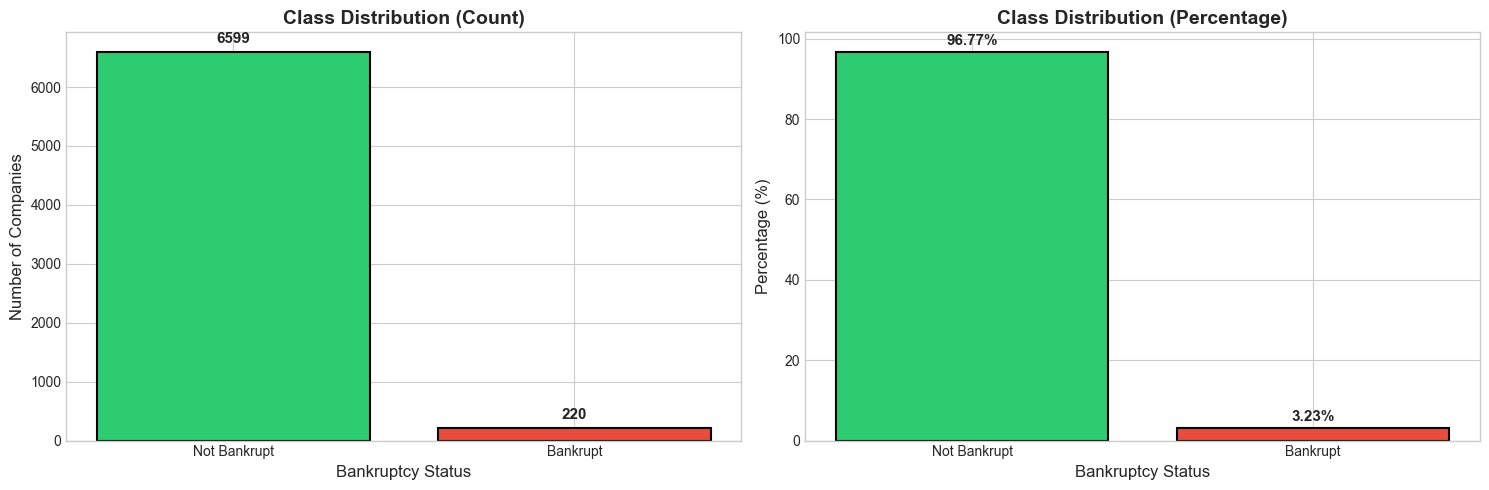

 Figure saved: figures/01_class_distribution.png


In [54]:
# Visualization 1: Class Distribution
import os
os.makedirs('figures', exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
counts = df['Bankrupt?'].value_counts().sort_index()
axes[0].bar(['Not Bankrupt', 'Bankrupt'], counts.values, color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Companies', fontsize=12)
axes[0].set_xlabel('Bankruptcy Status', fontsize=12)
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Percentage plot
percentages = df['Bankrupt?'].value_counts(normalize=True).sort_index() * 100
axes[1].bar(['Not Bankrupt', 'Bankrupt'], percentages.values, color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('Bankruptcy Status', fontsize=12)
for i, v in enumerate(percentages.values):
    axes[1].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved: figures/01_class_distribution.png")

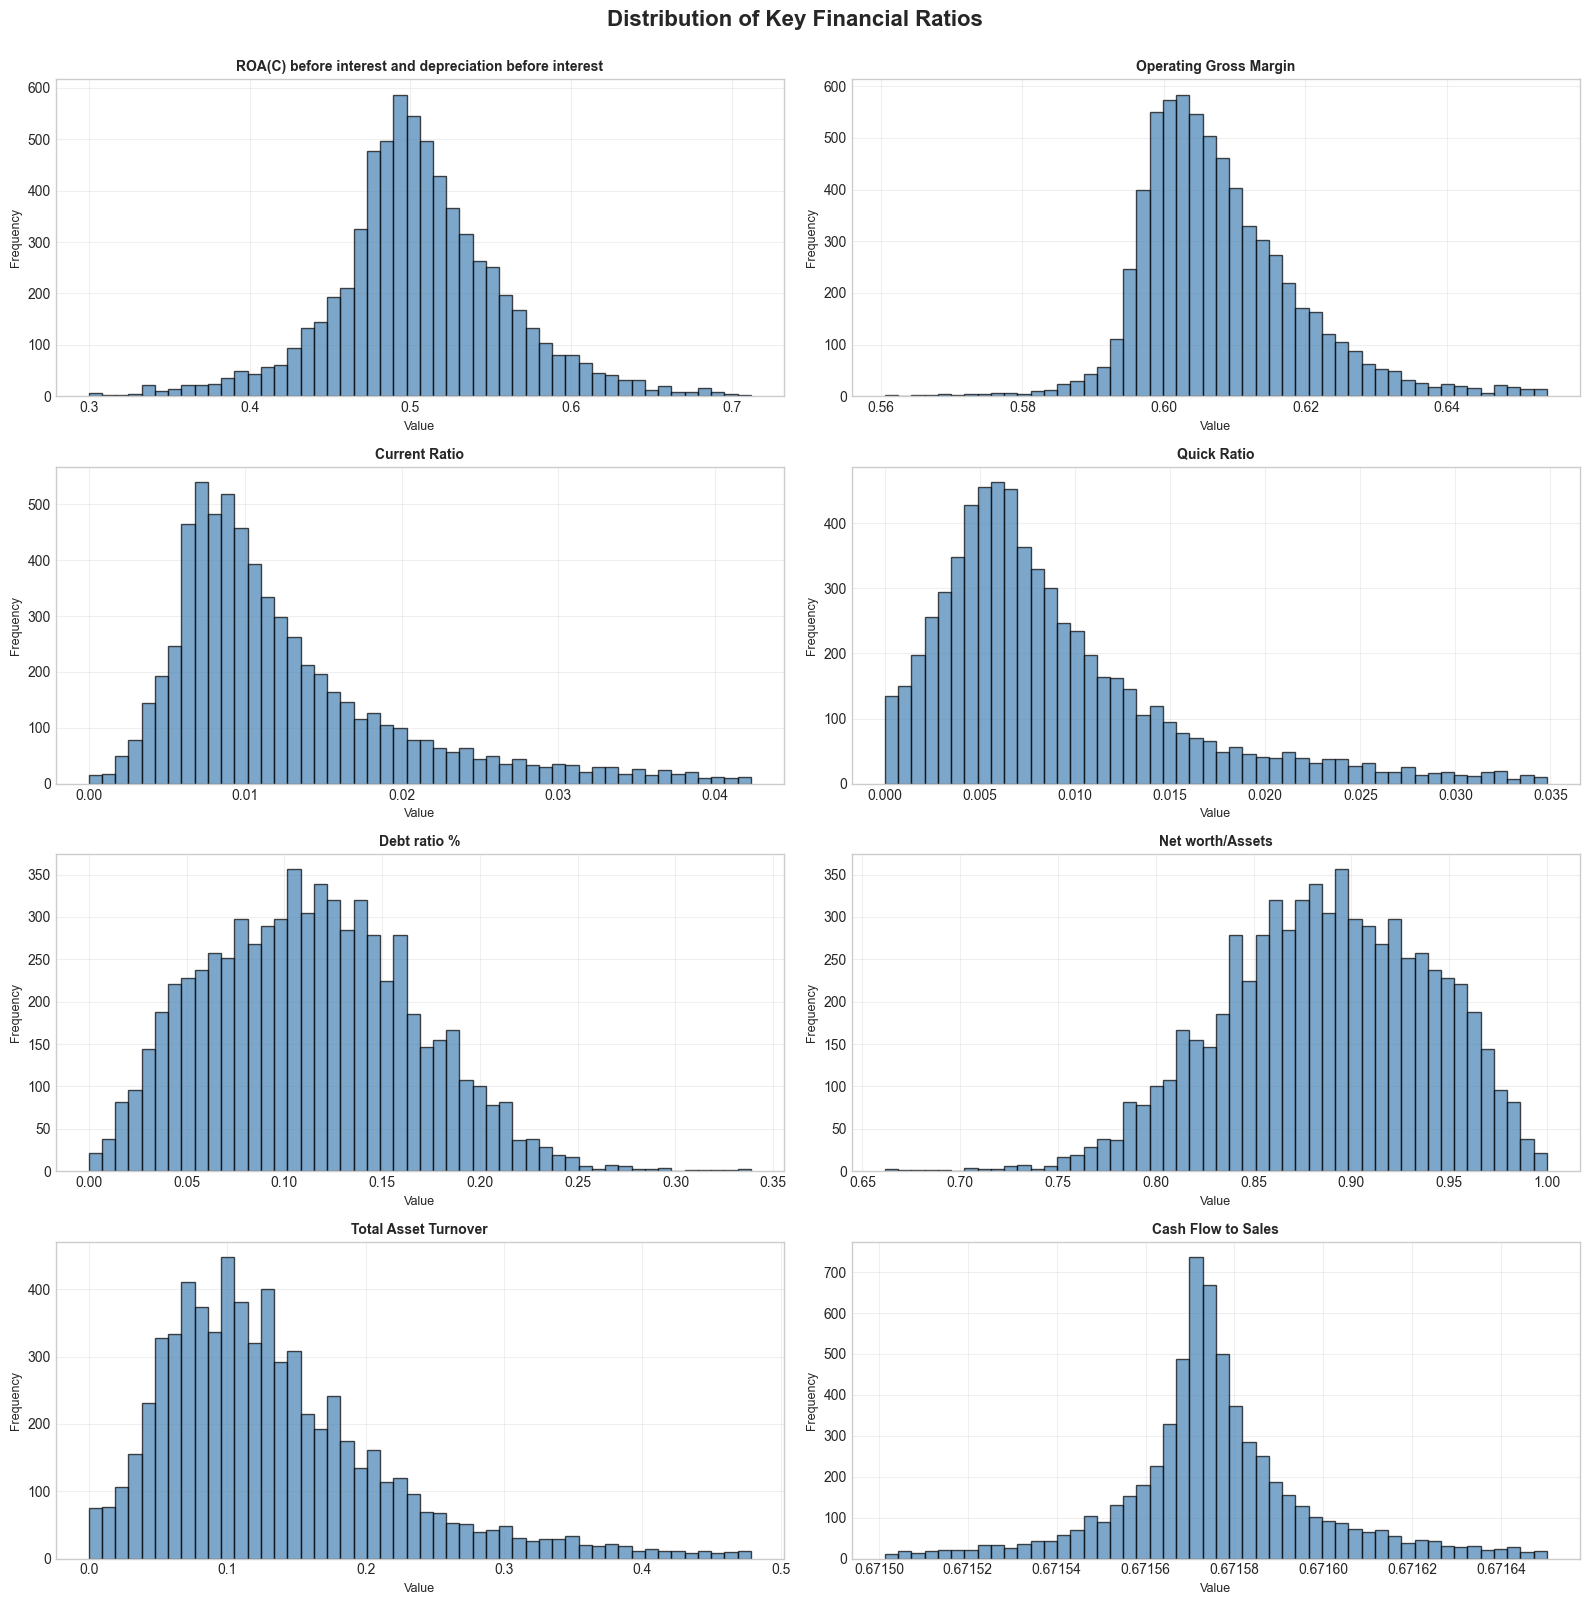

 Figure saved: figures/02_feature_distributions.png


In [56]:
# Visualization 2: Distribution of Key Features
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Remove extreme outliers for better visualization
    data = df[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    data_filtered = data[(data >= lower_bound) & (data <= upper_bound)]
    
    axes[idx].hist(data_filtered, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{feature.strip()}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Distribution of Key Financial Ratios', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('figures/02_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved: figures/02_feature_distributions.png")

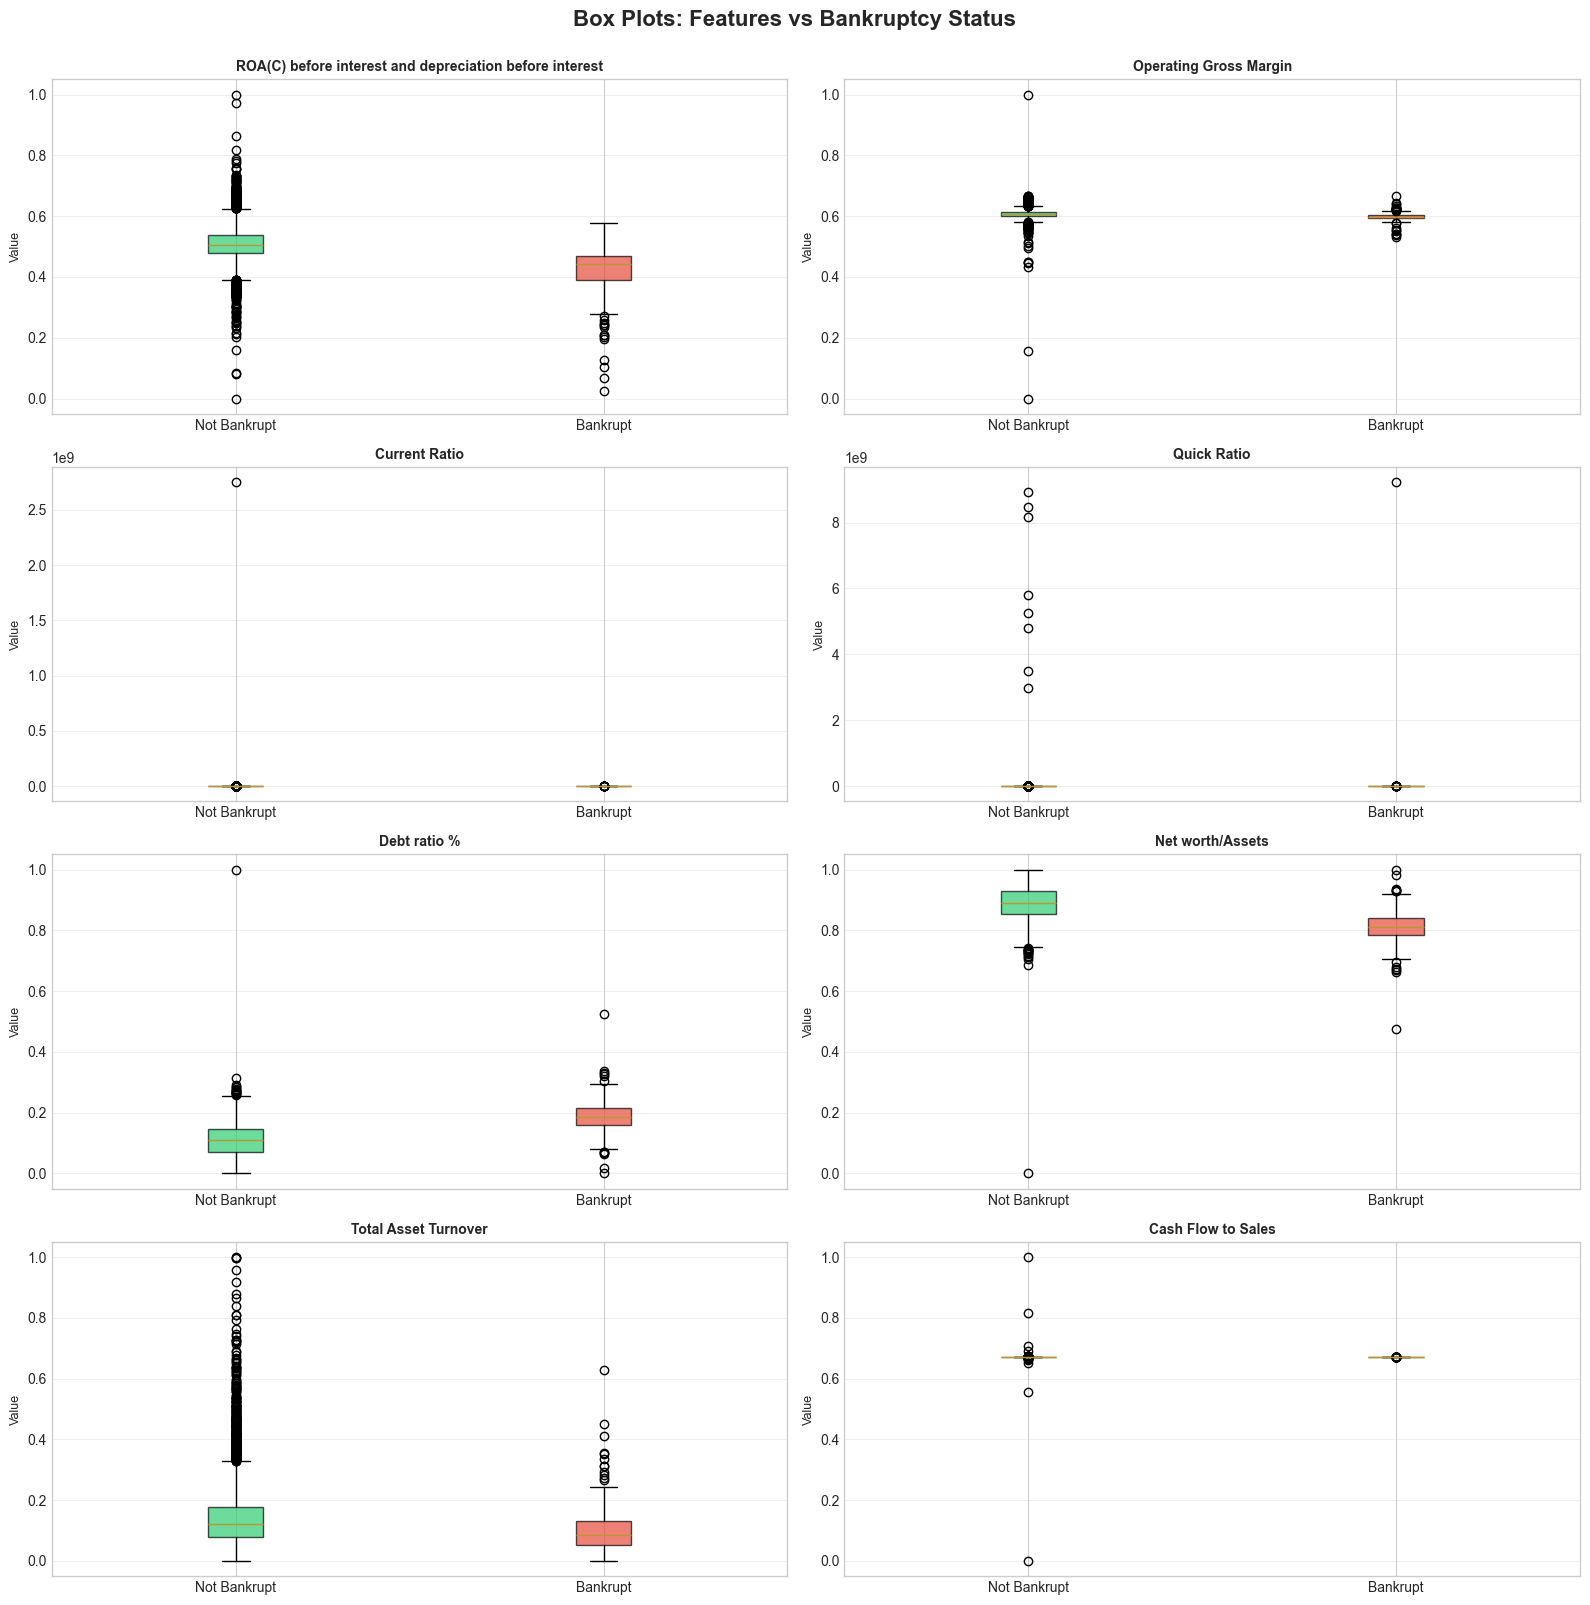

 Figure saved: figures/03_boxplots_by_status.png


In [55]:
# Visualization 3: Box Plots by Bankruptcy Status
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Prepare data
    data_to_plot = [df[df['Bankrupt?'] == 0][feature], df[df['Bankrupt?'] == 1][feature]]
    
    bp = axes[idx].boxplot(data_to_plot, labels=['Not Bankrupt', 'Bankrupt'], patch_artist=True)
    
    # Color the boxes
    colors = ['#2ecc71', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{feature.strip()}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Box Plots: Features vs Bankruptcy Status', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('figures/03_boxplots_by_status.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved: figures/03_boxplots_by_status.png")

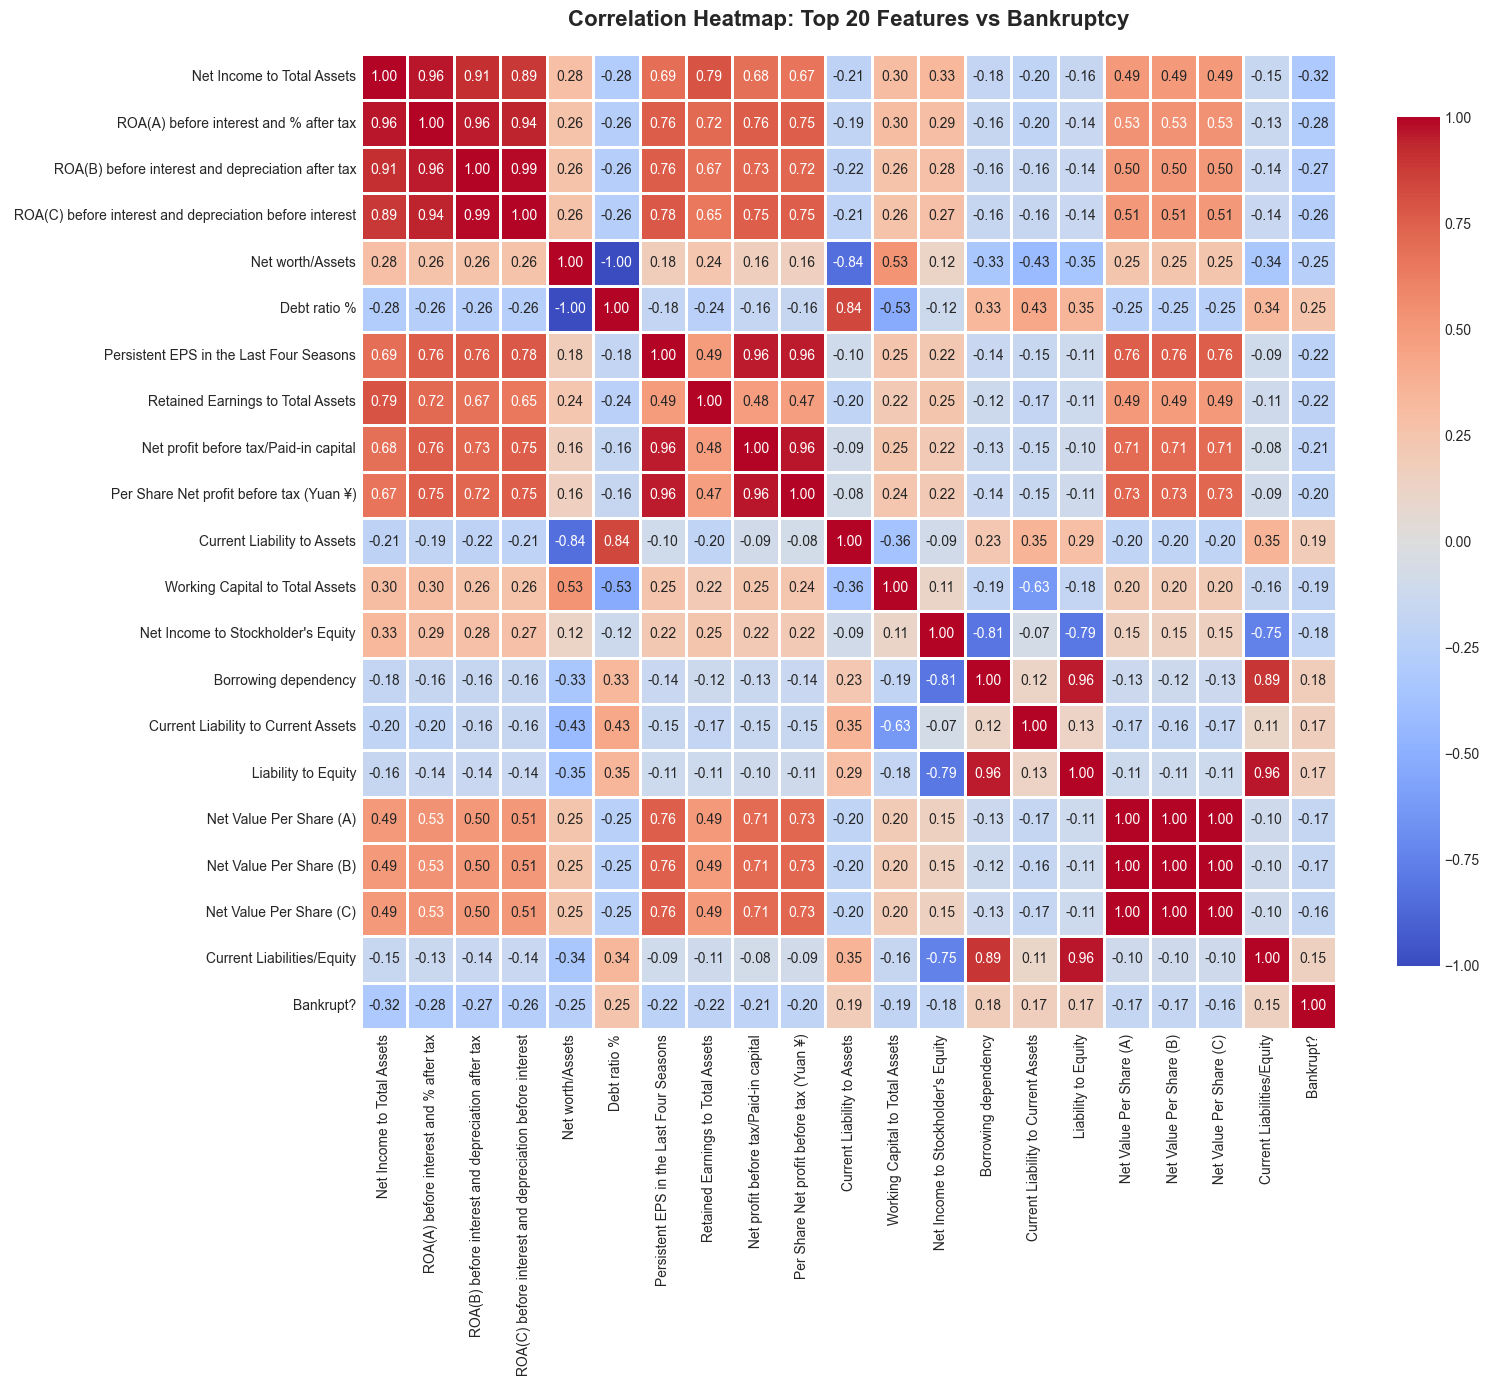

✓ Figure saved: figures/04_correlation_heatmap.png

Top 10 Features Correlated with Bankruptcy:
 1.  Net Income to Total Assets                                  | r = 0.3155
 2.  ROA(A) before interest and % after tax                      | r = 0.2829
 3.  ROA(B) before interest and depreciation after tax           | r = 0.2731
 4.  ROA(C) before interest and depreciation before interest     | r = 0.2608
 5.  Net worth/Assets                                            | r = 0.2502
 6.  Debt ratio %                                                | r = 0.2502
 7.  Persistent EPS in the Last Four Seasons                     | r = 0.2196
 8.  Retained Earnings to Total Assets                           | r = 0.2178
 9.  Net profit before tax/Paid-in capital                       | r = 0.2079
10.  Per Share Net profit before tax (Yuan ¥)                    | r = 0.2014


In [23]:
# Visualization 4: Correlation Heatmap (Top 20 features)
# Find top 20 features most correlated with bankruptcy
correlations = df.corr()['Bankrupt?'].abs().sort_values(ascending=False)
top_20_features = correlations[1:21].index.tolist()

# Create correlation matrix for top features
correlation_matrix = df[top_20_features + ['Bankrupt?']].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Top 20 Features vs Bankruptcy', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('figures/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure saved: figures/04_correlation_heatmap.png")
print("\nTop 10 Features Correlated with Bankruptcy:")
for i, (feature, corr) in enumerate(correlations[1:11].items(), 1):
    print(f"{i:2d}. {feature[:60]:<60} | r = {corr:.4f}")

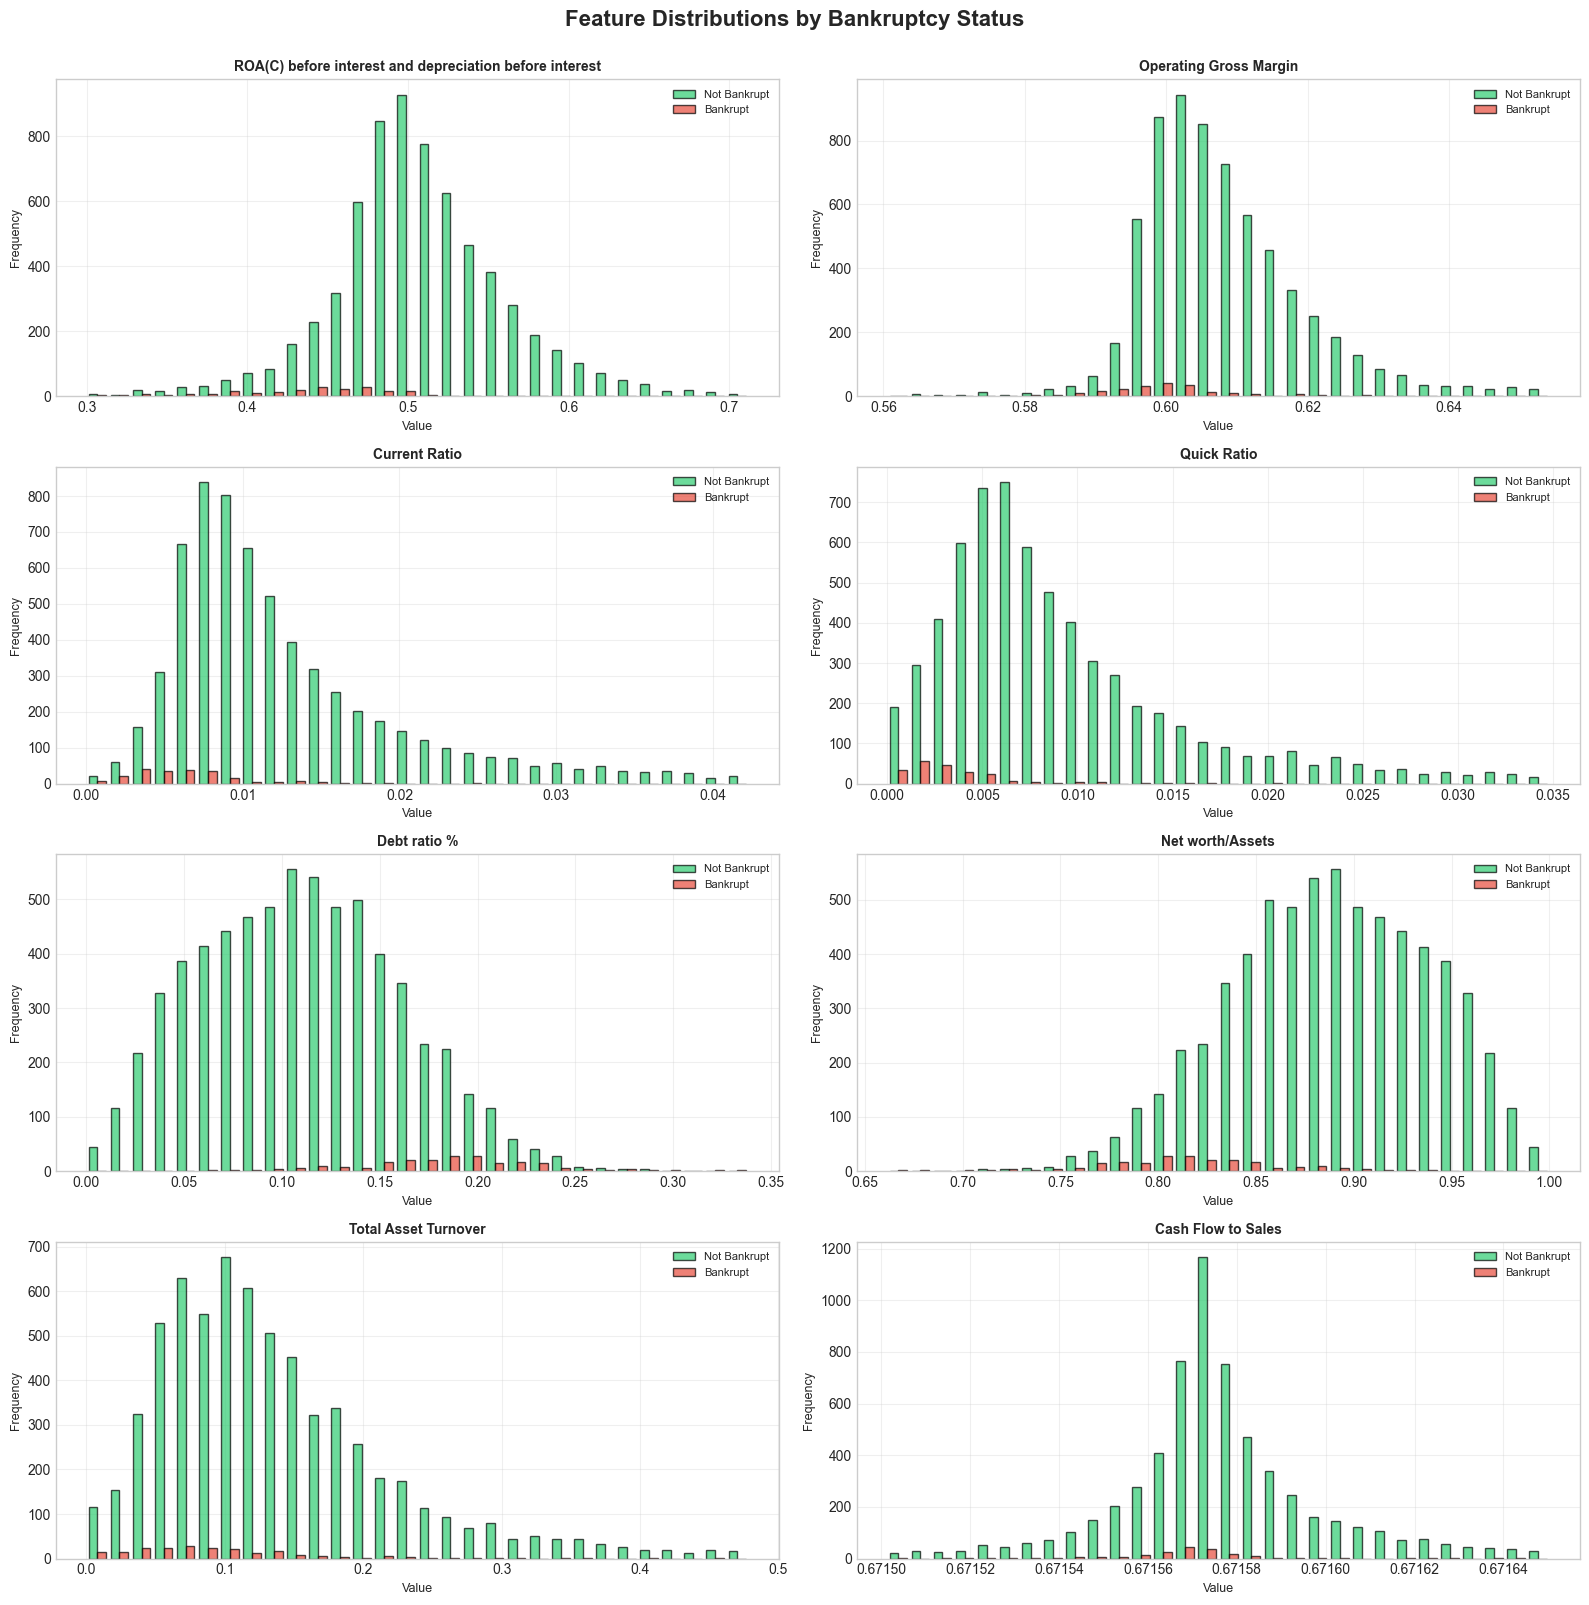

 Figure saved: figures/05_feature_comparison.png


In [57]:
# Visualization 5: Feature Comparison by Bankruptcy Status
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    bankrupt = df[df['Bankrupt?'] == 1][feature]
    not_bankrupt = df[df['Bankrupt?'] == 0][feature]
    
    # Remove extreme outliers for better visualization
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    not_bankrupt_filtered = not_bankrupt[(not_bankrupt >= lower_bound) & (not_bankrupt <= upper_bound)]
    bankrupt_filtered = bankrupt[(bankrupt >= lower_bound) & (bankrupt <= upper_bound)]
    
    axes[idx].hist([not_bankrupt_filtered, bankrupt_filtered], bins=30, 
                   label=['Not Bankrupt', 'Bankrupt'], 
                   color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{feature.strip()}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distributions by Bankruptcy Status', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('figures/05_feature_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved: figures/05_feature_comparison.png")

In [65]:
# Create experimental plan table
experimental_plan_data = {
    'Step': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Task': [
        'Data Preparation',
        'Train-Test Split (Stratified)',
        'Feature Scaling',
        'Apply SMOTE (Training Only)',
        'Train Logistic Regression',
        'Train Random Forest',
        'Train XGBoost',
        'Evaluate All Models',
        'Feature Importance Analysis',
        'Model Selection & Recommendations'
    ],
    'Input': [
        'Raw dataset (df)',
        'Cleaned data (X, y)',
        'X_train, X_test',
        'X_train_scaled',
        'X_train_resampled',
        'X_train_resampled',
        'X_train_resampled',
        'Trained models',
        'Best model',
        'All results'
    ],
    'Output': [
        'X (features), y (target)',
        'Train and test sets',
        'Scaled features',
        'Balanced training data',
        'LR predictions & metrics',
        'RF predictions & metrics',
        'XGB predictions & metrics',
        'Performance comparison table',
        'Top features ranked',
        'Best model + deployment plan'
    ],
    'Tool/Library': [
        'pandas',
        'sklearn.model_selection',
        'sklearn.preprocessing.StandardScaler',
        'imblearn.SMOTE',
        'sklearn.linear_model.LogisticRegression',
        'sklearn.ensemble.RandomForestClassifier',
        'xgboost.XGBClassifier',
        'sklearn.metrics',
        'model.feature_importances_',
        'Custom analysis'
    ]
}

exp_plan_df = pd.DataFrame(experimental_plan_data)


print("EXPERIMENTAL PLAN - DETAILED WORKFLOW")

display(exp_plan_df)

print("\n This plan will be executed in Section V")

EXPERIMENTAL PLAN - DETAILED WORKFLOW


,Step,Task,Input,Output,Tool/Library
0,1,Data Preparation,Raw dataset (df),"X (features), y (target)",pandas
1,2,Train-Test Split (Stratified),"Cleaned data (X, y)",Train and test sets,sklearn.model_selection
2,3,Feature Scaling,"X_train, X_test",Scaled features,sklearn.preprocessing.StandardScaler
3,4,Apply SMOTE (Training Only),X_train_scaled,Balanced training data,imblearn.SMOTE
4,5,Train Logistic Regression,X_train_resampled,LR predictions & metrics,sklearn.linear_model.LogisticRegression
5,6,Train Random Forest,X_train_resampled,RF predictions & metrics,sklearn.ensemble.RandomForestClassifier
6,7,Train XGBoost,X_train_resampled,XGB predictions & metrics,xgboost.XGBClassifier
7,8,Evaluate All Models,Trained models,Performance comparison table,sklearn.metrics
8,9,Feature Importance Analysis,Best model,Top features ranked,model.feature_importances_
9,10,Model Selection & Recommendations,All results,Best model + deployment plan,Custom analysis



 This plan will be executed in Section V


In [31]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.3706,0.4244,0.4057,0.6015,0.6015,0.9990,0.7969,0.8088,0.3026,0.7810,1.2570e-04,0.0000e+00,0.4581,7.2507e-04,0.0000,0.1479,0.1479,0.1479,0.1691,0.3117,0.0176,0.0959,0.1387,0.0221,0.8482,0.6890,0.6890,0.2175,4.9800e+09,0.0003,0.2631,0.3637,0.0023,0.0012,0.6300,0.0213,0.2076,0.7924,0.0050,0.3903,0.0065,0.0959,0.1378,0.3980,0.0870,0.0018,0.0035,1.8209e-04,1.1650e-04,0.0329,0.0342,0.3929,0.0371,0.6728,0.1667,0.1906,0.0041,0.0020,1.4734e-04,0.1473,0.3340,0.2769,0.0010,0.6763,0.7213,0.3391,2.5592e-02,0.9032,0.0020,0.0649,7.0100e+08,6.5500e+09,0.5938,4.5800e+08,0.6716,0.4242,0.6763,0.3391,0.1265,0.6376,0.4586,0.5204,0.3129,0.1183,0,0.7168,0.0092,0.6229,0.6015,0.8279,0.2902,0.0266,0.5641,1,0.0165
1,1,0.4643,0.5382,0.5167,0.6102,0.6102,0.9989,0.7974,0.8093,0.3036,0.7815,2.8979e-04,0.0000e+00,0.4619,6.4706e-04,0.0000,0.1823,0.1823,0.1823,0.2089,0.3181,0.0211,0.0937,0.1699,0.0221,0.8481,0.6897,0.6897,0.2176,6.1100e+09,0.0004,0.2645,0.3767,0.0060,0.0040,0.6352,0.0125,0.1712,0.8288,0.0051,0.3768,0.0058,0.0937,0.1690,0.3977,0.0645,0.0013,0.0049,9.3600e+09,7.1900e+08,0.0255,0.0069,0.3916,0.0123,0.7511,0.1272,0.1824,0.0149,0.0041,1.3839e-03,0.0570,0.3411,0.2896,0.0052,0.3086,0.7320,0.3297,2.3947e-02,0.9311,0.0022,0.0255,1.0652e-04,7.7000e+09,0.5939,2.4900e+09,0.6716,0.4688,0.3086,0.3297,0.1209,0.6411,0.4590,0.5671,0.3142,0

In [33]:
df.tail

<bound method NDFrame.tail of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                             0.3706          
1             1                                             0.4643          
2             1                                             0.4261          
3             1                                             0.3998          
4             1                                             0.4650          
...         ...                                                ...          
6814          0                                             0.4937          
6815          0                                             0.4752          
6816          0                                             0.4727          
6817          0                                             0.5063          
6818          0                                             0.4931          

       ROA(A) before interest and % after tax

In [35]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

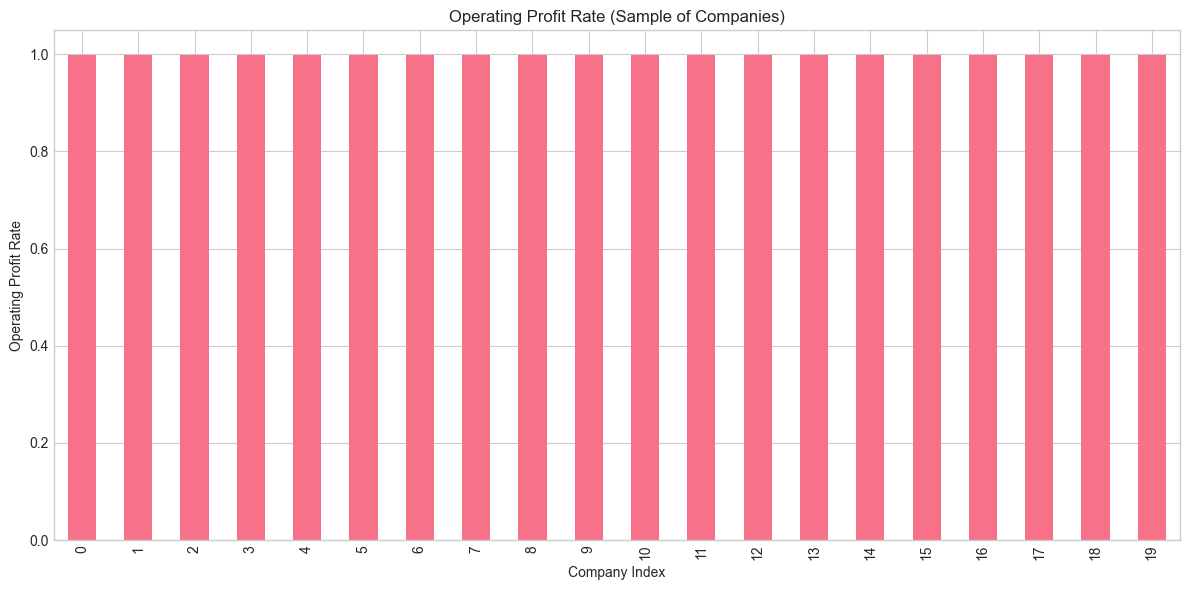

In [37]:
profit_col = ' Operating Profit Rate'

# Plot bar chart (first 20 rows to keep it readable)
plt.figure(figsize=(12, 6))
df[profit_col].head(20).plot(kind='bar')

plt.title('Operating Profit Rate (Sample of Companies)')
plt.xlabel('Company Index')
plt.ylabel('Operating Profit Rate')
plt.tight_layout()
plt.show()

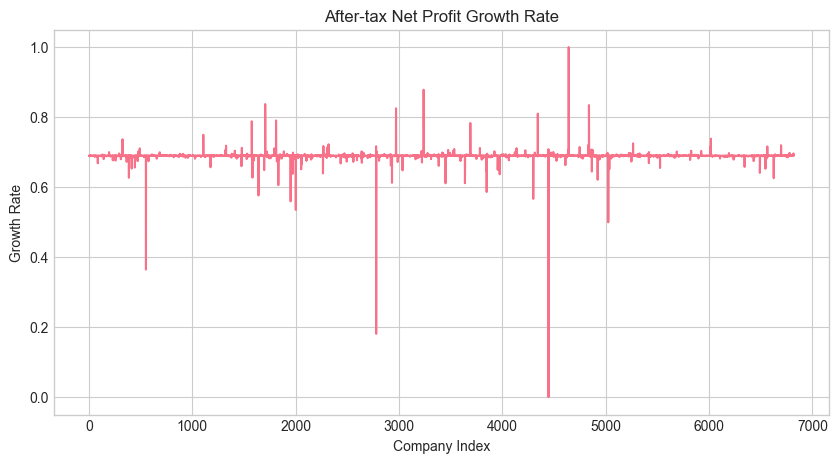

In [41]:
growth_col = ' After-tax Net Profit Growth Rate'

plt.figure(figsize=(10, 5))
plt.plot(df[growth_col])

plt.title('After-tax Net Profit Growth Rate')
plt.xlabel('Company Index')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()


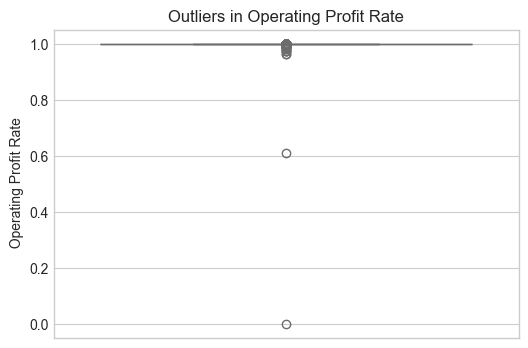

In [42]:
col = ' Operating Profit Rate'

plt.figure(figsize=(6, 4))
sns.boxplot(y=df[col])

plt.title('Outliers in Operating Profit Rate')
plt.ylabel(col)
plt.show()

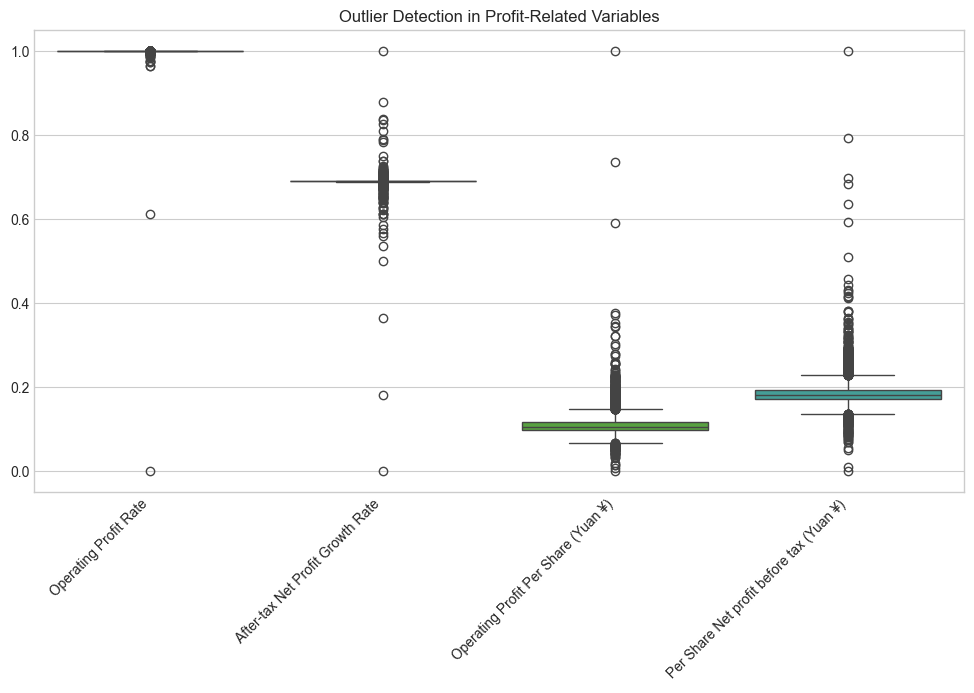

In [44]:
profit_cols = [
    ' Operating Profit Rate',
    ' After-tax Net Profit Growth Rate',
    ' Operating Profit Per Share (Yuan ¥)',
    ' Per Share Net profit before tax (Yuan ¥)'
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[profit_cols])

plt.xticks(rotation=45, ha='right')
plt.title('Outlier Detection in Profit-Related Variables')
plt.show()

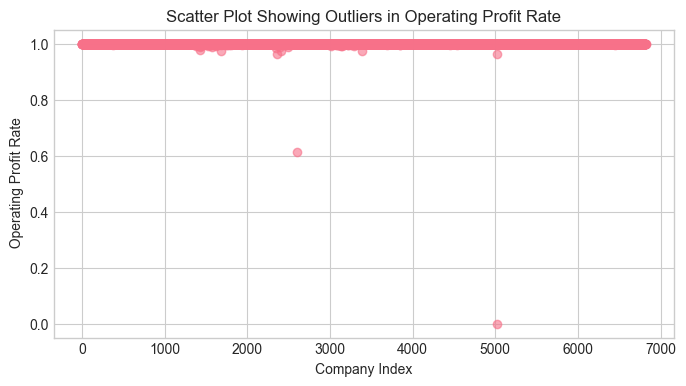

In [45]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(df[col])), df[col], alpha=0.6)

plt.title('Scatter Plot Showing Outliers in Operating Profit Rate')
plt.xlabel('Company Index')
plt.ylabel(col)
plt.show()


In [46]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")
outliers[[col]].head()


Number of outliers: 716


,Operating Profit Rate
3,0.9987
5,0.9988
119,0.9987
193,0.9986
232,0.9987


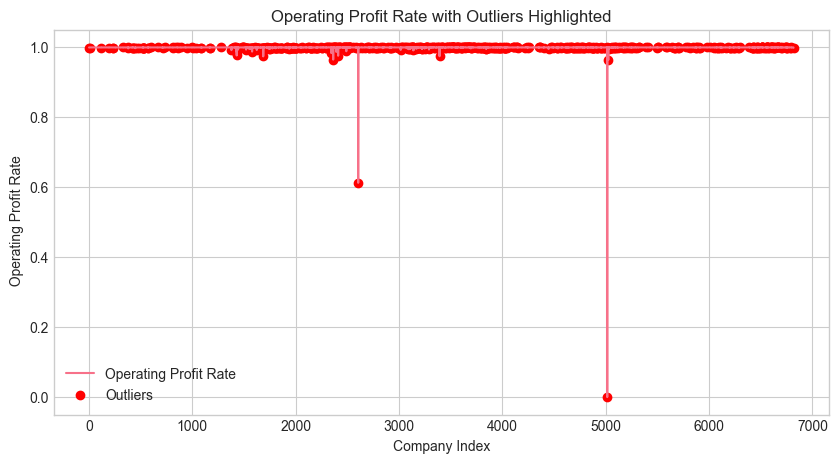

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(df[col], label='Operating Profit Rate')

plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')

plt.title('Operating Profit Rate with Outliers Highlighted')
plt.xlabel('Company Index')
plt.ylabel(col)
plt.legend()
plt.show()


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 